In [ ]:
#PAQUETES 
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

In [ ]:
#https://datamexico.org/es/profile/geo/mexico?occupationSelectorGender1=gender2&quarterOccupationSelector1=20164&quarterOccupationSelector2=20204&workforceSelector=salaryOption
#LISTA DE NOMBRES DE MIS ARCHIVOS
lista_fem=[ f'/content/sample_data/Distribucion-fuerza-laboral-femenina-por-ocupaciones-en-MexicoColoreado-por-salario-promedio-mensual-en-cuarto-trimestre-de-{2016+i}.csv' for i in range(0,5)]
lista_masc=[ f'/content/sample_data/Distribucion-fuerza-laboral-masculina-por-ocupaciones-en-MexicoColoreado-por-salario-promedio-mensual-en-cuarto-trimestre-de-{2016+i}.csv' for i in range(0,5)]
lista_fuerzalaboral= lista_fem + lista_masc

In [ ]:
#Realizamos la lectura de todos los archivos csv juntos y reemplazamos -99 por NaN
lista_df= [(pd.read_csv(f'{i}',sep=',')).replace(-99, np.nan) for i in lista_fuerzalaboral]

In [ ]:
lista_df[5]

,Category ID,Category,Group ID,Group,Subgroup ID,Subgroup,Occupation ID,Occupation,Sex ID,Sex,Year,Quarter ID,Quarter,Workforce,Monthly Wage,Monthly Wage Growth,Monthly Wage Growth Value,percentage,lastPeriod
0,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,111,"Funcionarios, Legisladores y Autoridades Guber...",1111,Altas Autoridades Gubernamentales y Jurisdicci...,1,Hombre,2016,20164,2016-Q4,268,34029.850746,1,34029.850746,0.000008,0
1,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,111,"Funcionarios, Legisladores y Autoridades Guber...",1112,Legisladores,1,Hombre,2016,20164,2016-Q4,1053,44021.842355,1,44021.842355,0.000033,0
2,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,111,"Funcionarios, Legisladores y Autoridades Guber...",1113,Presidentes y Autoridades Municipales,1,Hombre,2016,20164,2016-Q4,9879,8868.939164,1,8868.939164,0.000307,0
3,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,112,Presidentes y Directores Generales,1121,Presidentes y Directores Generales en Instituc...,1,Hombre,2016,20164,2016-Q4,3905,31309.859155,1,31309.859155,0.000121,0
4,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,112,Presidentes y Directores Generales,1122,Presidentes y Directores Generales en Instituc...,1,Hombre,2016,20164,2016-Q4,58200,9781.563746,1,9781.563746,0.001807,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,9,Trabajadores en Actividades Elementales y de A...,97,"Trabajadores de Paquetería, de Apoyo para Espe...",972,Trabajadores Repartidores de Mensajería y Merc...,9723,Repartidores de Mercancías (A Pie y en Bicicleta),1,Hombre,2016,20164,2016-Q4,26510,1932.708525,1,1932.708525,0.000823,0
449,9,Trabajadores en Actividades Elementales y de A...,97,"Trabajadores de Paquetería, de Apoyo para Espe...",973,"Lecturistas de Medidores, Recolectores de Dine...",9731,Lecturistas de Medidores,1,Hombre,2016,20164,2016-Q4,12385,5625.683488,1,5625.683488,0.000384,0
450,9,Trabajadores en Actividades Elementales y de A...,97,"Trabajadores de Paquetería, de Apoyo para Espe...",973,"Lecturistas de Medidores, Recolectores de Dine...",9733,Elevadoristas y Ascensoristas,1,Hombre,2016,20164,2016-Q4,338,9878.698225,1,9878.698225,0.000010,0
451,9,Trabajadores en Actividades Elementales y de A...,98,Otros Trabajadores en Actividades Elementales ...,989,Otros Trabajadores en Actividades Elementales ...,9899,Otros Trabajadores en Actividades Elementales ...,1,Hombre,2016,20164,2016-Q4,5037,2436.738535,1,2436.738535,0.000156,0


In [ ]:
#concat -> función par unir dos o más datasets con las mismas columnas
fuerza_laboral1620 = pd.concat(lista_df)
fuerza_laboral1620

,Category ID,Category,Group ID,Group,Subgroup ID,Subgroup,Occupation ID,Occupation,Sex ID,Sex,Year,Quarter ID,Quarter,Workforce,Monthly Wage,Monthly Wage Growth,Monthly Wage Growth Value,percentage,lastPeriod
0,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,111,"Funcionarios, Legisladores y Autoridades Guber...",1112,Legisladores,2,Mujer,2016,20164,2016-Q4,300,0.000000,1.000000,0.000000,0.000015,0.000000
1,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,111,"Funcionarios, Legisladores y Autoridades Guber...",1113,Presidentes y Autoridades Municipales,2,Mujer,2016,20164,2016-Q4,4983,9264.579571,1.000000,9264.579571,0.000250,0.000000
2,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,112,Presidentes y Directores Generales,1121,Presidentes y Directores Generales en Instituc...,2,Mujer,2016,20164,2016-Q4,2181,5346.315452,1.000000,5346.315452,0.000110,0.000000
3,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,112,Presidentes y Directores Generales,1122,Presidentes y Directores Generales en Instituc...,2,Mujer,2016,20164,2016-Q4,10155,6385.240768,1.000000,6385.240768,0.000510,0.000000
4,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,113,"Directores de Organizaciones Políticas, Sindic...",1131,Directores de Organizaciones Políticas,2,Mujer,2016,20164,2016-Q4,1692,4080.700355,1.000000,4080.700355,0.000085,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,9,Trabajadores en Actividades Elementales y de A...,97,"Trabajadores de Paquetería, de Apoyo para Espe...",972,Trabajadores Repartidores de Mensajería y Merc...,9722,Repartidores de Mensajería (A Pie y en Bicicle...,1,Hombre,2020,20204,2020-Q4,67872,4106.718441,0.082993,314.710030,0.002082,3792.008410
449,9,Trabajadores en Actividades Elementales y de A...,97,"Trabajadores de Paquetería, de Apoyo para Espe...",972,Trabajadores Repartidores de Mensajería y Merc...,9723,Repartidores de Mercancías (A Pie y en Bicicleta),1,Hombre,2020,20204,2020-Q4,62426,1804.263079,-0.066459,-128.445446,0.001915,1932.708525
450,9,Trabajadores en Actividades Elementales y de A...,97,"Trabajadores de Paquetería, de Apoyo para Espe...",973,"Lecturistas de Medidores, Recolectores de Dine...",9731,Lecturistas de Medidores,1,Hombre,2020,20204,2020-Q4,10849,10977.971242,0.951402,5352.287753,0.000333,5625.683488
451,9,Trabajadores en Actividades Elementales y de A...,98,Otros Trabajadores en Actividades Elementales ...,989,Otros Trabajadores en Actividades Elementales ...,9899,Otros Trabajadores en Actividades Elementales ...,1,Hombre,2020,20204,2020-Q4,1028,6326.301556,1.596217,3889.563022,0.000032,2436.738535


In [ ]:
#dtypes para comprobar el tipo de dato de mis columnas
fuerza_laboral1620.dtypes

Category ID                    int64
Category                      object
Group ID                       int64
Group                         object
Subgroup ID                    int64
Subgroup                      object
Occupation ID                  int64
Occupation                    object
Sex ID                         int64
Sex                           object
Year                           int64
Quarter ID                     int64
Quarter                       object
Workforce                      int64
Monthly Wage                 float64
Monthly Wage Growth          float64
Monthly Wage Growth Value    float64
percentage                   float64
lastPeriod                   float64
dtype: object

In [ ]:
#Tipo de dato de un dataframe en pandas
type(fuerza_laboral1620)

pandas.core.frame.DataFrame

In [ ]:
#tamaño de mi dataframe (filas, columnas)
fuerza_laboral1620.shape

(4337, 19)

In [ ]:
#nombre de columnas
fuerza_laboral1620.columns

Index(['Category ID', 'Category', 'Group ID', 'Group', 'Subgroup ID',
       'Subgroup', 'Occupation ID', 'Occupation', 'Sex ID', 'Sex', 'Year',
       'Quarter ID', 'Quarter', 'Workforce', 'Monthly Wage',
       'Monthly Wage Growth', 'Monthly Wage Growth Value', 'percentage',
       'lastPeriod'],
      dtype='object')

In [ ]:
fuerza_laboral1620.head()

,Category ID,Category,Group ID,Group,Subgroup ID,Subgroup,Occupation ID,Occupation,Sex ID,Sex,Year,Quarter ID,Quarter,Workforce,Monthly Wage,Monthly Wage Growth,Monthly Wage Growth Value,percentage,lastPeriod
0,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,111,"Funcionarios, Legisladores y Autoridades Guber...",1112,Legisladores,2,Mujer,2016,20164,2016-Q4,300,0.000000,1.0,0.000000,0.000015,0.0
1,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,111,"Funcionarios, Legisladores y Autoridades Guber...",1113,Presidentes y Autoridades Municipales,2,Mujer,2016,20164,2016-Q4,4983,9264.579571,1.0,9264.579571,0.000250,0.0
2,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,112,Presidentes y Directores Generales,1121,Presidentes y Directores Generales en Instituc...,2,Mujer,2016,20164,2016-Q4,2181,5346.315452,1.0,5346.315452,0.000110,0.0
3,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,112,Presidentes y Directores Generales,1122,Presidentes y Directores Generales en Instituc...,2,Mujer,2016,20164,2016-Q4,10155,6385.240768,1.0,6385.240768,0.000510,0.0
4,1,"Funcionarios, Directores y Jefes",11,Funcionarios y Altas Autoridades de los Sector...,113,"Directores de Organizaciones Políticas, Sindic...",1131,Directores de Organizaciones Políticas,2,Mujer,2016,20164,2016-Q4,1692,4080.700355,1.0,4080.700355,0.000085,0.0


In [ ]:
fuerza_laboral1620.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4337 entries, 0 to 452
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category ID                4337 non-null   int64  
 1   Category                   4337 non-null   object 
 2   Group ID                   4337 non-null   int64  
 3   Group                      4337 non-null   object 
 4   Subgroup ID                4337 non-null   int64  
 5   Subgroup                   4337 non-null   object 
 6   Occupation ID              4337 non-null   int64  
 7   Occupation                 4337 non-null   object 
 8   Sex ID                     4337 non-null   int64  
 9   Sex                        4337 non-null   object 
 10  Year                       4337 non-null   int64  
 11  Quarter ID                 4337 non-null   int64  
 12  Quarter                    4337 non-null   object 
 13  Workforce                  4337 non-null   int64 

In [ ]:
fuerza_laboral1620.describe()

,Category ID,Group ID,Subgroup ID,Occupation ID,Sex ID,Year,Quarter ID,Workforce,Monthly Wage,Monthly Wage Growth,Monthly Wage Growth Value,percentage,lastPeriod
count,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4.337000e+03,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000
mean,4.445700,47.810699,480.705787,4809.787411,1.475444,2018.002767,20184.027669,6.183975e+04,5300.702429,0.659970,1509.524577,0.002306,3791.177853
std,2.857447,28.284400,282.856228,2828.511963,0.499454,1.413069,14.130688,1.889777e+05,4265.034847,2.542614,5020.637905,0.007205,3872.915590
min,1.000000,11.000000,111.000000,1111.000000,1.000000,2016.000000,20164.000000,3.100000e+01,0.000000,-1.000000,-44021.842355,0.000001,0.000000
25%,2.000000,23.000000,233.000000,2335.000000,1.000000,2017.000000,20174.000000,2.682000e+03,3132.473588,-0.068284,-305.831106,0.000109,281.127937
50%,3.000000,39.000000,399.000000,3999.000000,1.000000,2018.000000,20184.000000,1.088200e+04,4604.322914,0.228804,722.322268,0.000393,3446.162441
75%,7.000000,74.000000,741.000000,7412.000000,2.000000,2019.000000,20194.000000,4.001600e+04,6348.727119,1.000000,3141.569916,0.001462,5318.197420
max,9.000000,99.000000,999.000000,9999.000000,2.000000,2020.000000,20204.000000,2.151319e+06,64926.879587,55.262641,59580.564136,0.094803,44021.842355


In [ ]:
fuerza_laboral1620['Sex'].describe()

count       4337
unique         2
top       Hombre
freq        2275
Name: Sex, dtype: object

In [ ]:
Ocupaciones_201620 = fuerza_laboral1620.loc[:,['Occupation', 'Sex', 'Year', 'Workforce','Monthly Wage']]

In [ ]:
list(fuerza_laboral1620.Occupation.unique())

['Legisladores',
 'Presidentes y Autoridades Municipales',
 'Presidentes y Directores Generales en Instituciones Públicas',
 'Presidentes y Directores Generales en Instituciones y Empresas Privadas',
 'Directores de Organizaciones Políticas',
 'Directores de Organizaciones Sindicales',
 'Directores de Organizaciones Empresariales',
 'Directores de Organizaciones Agrarias',
 'Directores de Organizaciones Civiles y Religiosas',
 'Directores y Gerentes en Administración, Recursos Humanos y Mercadotecnia',
 'Directores y Gerentes en Servicios Contables, Financieros, Banca y Seguros',
 'Directores y Gerentes en Servicios de Salud, Protección Civil y Medio Ambiente',
 'Directores y Gerentes en Desarrollo Social y Económico',
 'Directores y Gerentes en Centros de Enseñanza y Capacitación',
 'Jueces de Juzgado, Directores y Gerentes en Servicios Legales y Procuración de Justicia',
 'Directores en Servicios de Vigilancia y Seguridad',
 'Directores y Gerentes en Producción Agropecuaria, Silvícol

In [ ]:
OcupacionesSwHw = Ocupaciones_201620[Ocupaciones_201620.Occupation.isin(['Investigadores y Especialistas en Matemáticas, Estadística y Actuaría','Desarrolladores y Analistas de Software y Multimedia',
 'Administradores de Bases de Datos y Redes de Computadora',
 'Ingenieros en Comunicaciones y Telecomunicaciones','Técnicos en la Instalación y Reparación de Redes, Equipos y en Sistemas Computacionales'])]

In [ ]:
OcupacionesSwHw

,Occupation,Sex,Year,Workforce,Monthly Wage
77,"Investigadores y Especialistas en Matemáticas,...",Mujer,2016,2536,2145.583596
92,Desarrolladores y Analistas de Software y Mult...,Mujer,2016,26001,5669.031960
93,Administradores de Bases de Datos y Redes de C...,Mujer,2016,3498,1493.704974
94,Ingenieros en Comunicaciones y Telecomunicaciones,Mujer,2016,1521,0.000000
160,Técnicos en la Instalación y Reparación de Red...,Mujer,2016,53363,2767.803591
80,"Investigadores y Especialistas en Matemáticas,...",Mujer,2017,811,5493.538841
97,Desarrolladores y Analistas de Software y Mult...,Mujer,2017,34936,4795.282803
98,Administradores de Bases de Datos y Redes de C...,Mujer,2017,1634,8567.319461
99,Ingenieros en Comunicaciones y Telecomunicaciones,Mujer,2017,2028,6830.177515
165,Técnicos en la Instalación y Reparación de Red...,Mujer,2017,49111,2789.315612


**FUERZA DE TRABAJO**

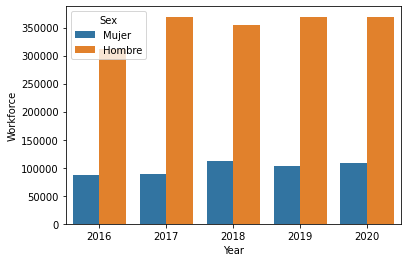

In [ ]:
#FUERZA DE TRABAJO POR AÑO
sns.barplot(x='Year', y='Workforce', hue='Sex', data=OcupacionesSwHw, estimator=sum, ci = None)

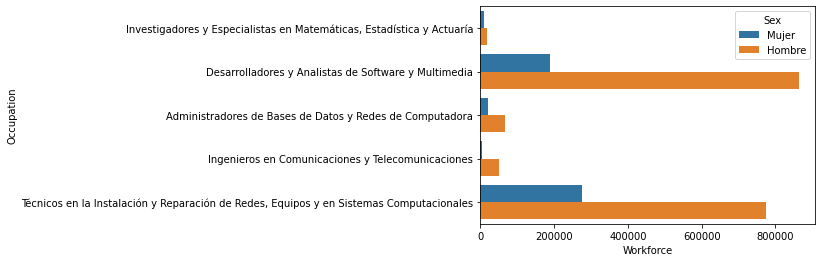

In [ ]:
#FUERZA DE TRABAJO POR OCUPACIÓN DURANTE LOS 5 AÑOS
import seaborn as sns
sns.barplot(x='Workforce', y='Occupation', hue='Sex', data=OcupacionesSwHw, estimator=sum, ci=None)

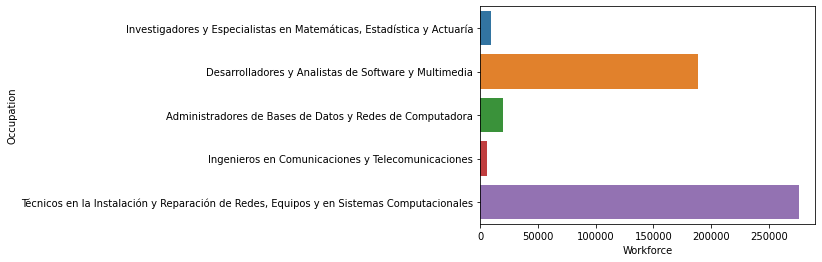

In [ ]:
sns.barplot(x='Workforce', y='Occupation', data=OcupacionesSwHw[OcupacionesSwHw.Sex=='Mujer'], estimator=sum, ci=None)

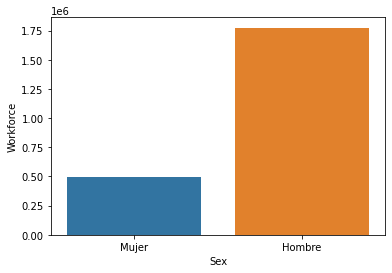

In [ ]:
sns.barplot(x='Sex', y='Workforce', data=OcupacionesSwHw, estimator=sum, ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


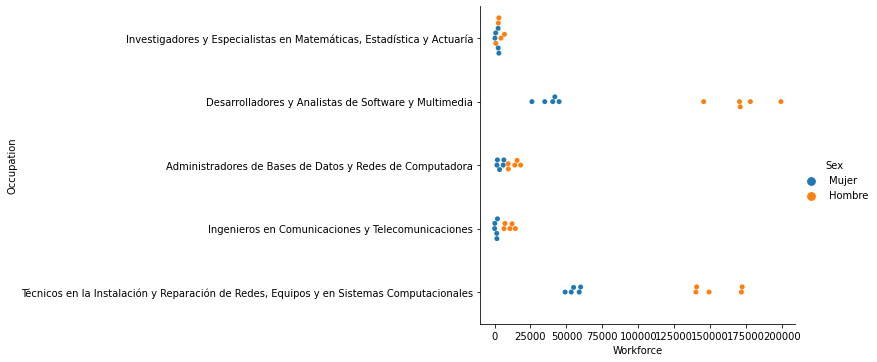

In [ ]:
sns.catplot(x="Workforce", y="Occupation", hue="Sex", kind="swarm", data=OcupacionesSwHw)

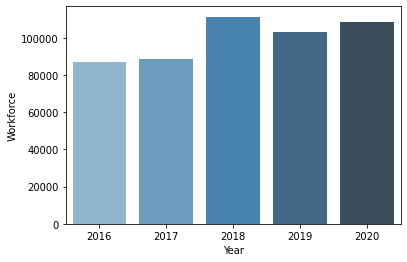

In [ ]:
sns.barplot(x='Year', y='Workforce', data=OcupacionesSwHw[OcupacionesSwHw.Sex=='Mujer'], estimator=sum, palette="Blues_d", ci=None)

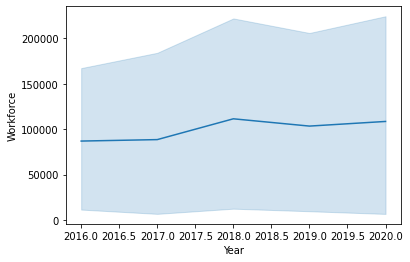

In [ ]:
sns.lineplot(data=OcupacionesSwHw[OcupacionesSwHw.Sex=='Mujer'], x="Year", y="Workforce", estimator=sum)

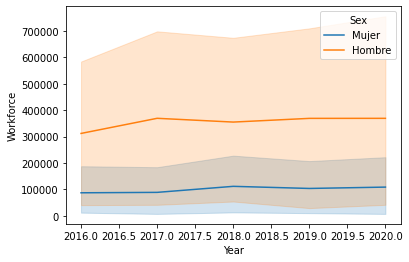

In [ ]:
sns.lineplot(data=OcupacionesSwHw, x="Year", y="Workforce", hue="Sex", estimator=sum)

**SUELDOS**

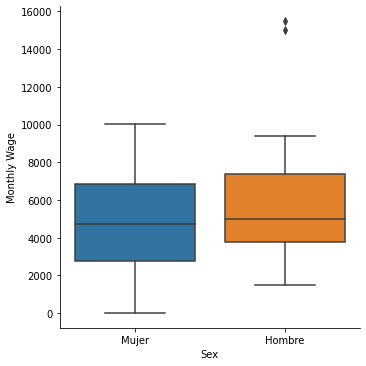

In [ ]:
#SUELDO POR GENERO
sns.catplot(x="Sex", y="Monthly Wage", kind="box", data=OcupacionesSwHw, estimator=sum)

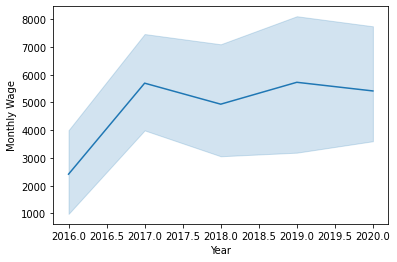

In [ ]:
#PROMEDIO DE SUELDO MENSUAL POR AÑO
sns.lineplot(data=OcupacionesSwHw[OcupacionesSwHw.Sex=='Mujer'], x="Year", y="Monthly Wage")

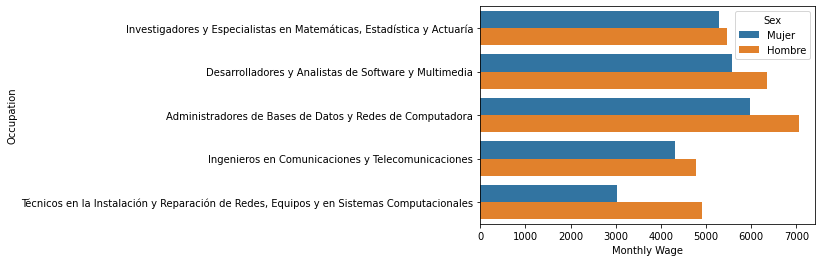

In [ ]:
sns.barplot(x='Monthly Wage', y='Occupation', hue='Sex', data=OcupacionesSwHw, ci=None)